In [21]:
using LinearAlgebra
using Printf
using Plots
Length = 300 #mm
Width = 144  #mm

number_cell = 8
thickness_ratio = 15    
Cell_theta = 30
ratios_x = 0.5
ratios_y = 0.0
vertical=1                                #Put 1 to make lattice rotate from horizontal position 
times = 1                                 #number of rotation
enable_notch = 1
notch_length = 36.0                     # mm
notch_thickness = 1.0                   # mm
model_type = 1
lc_para = 2.5                           #lc=t/lc_para

2.5

nx 12 ny 8
length ->21.650635094610966
thickness ->1.4433756729740643


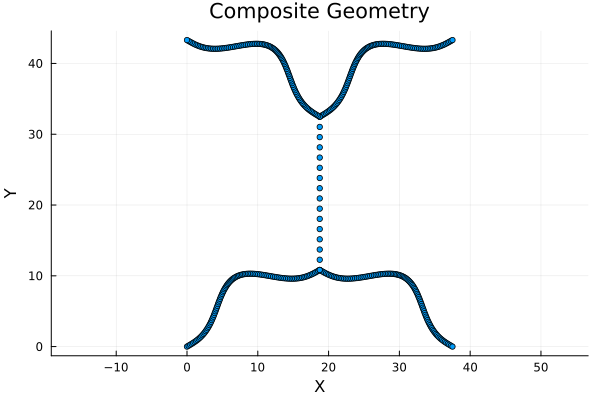

computing intersection-->1
computing intersection-->2
computing intersection-->3
computing intersection-->4
computing intersection-->5
computing intersection-->6


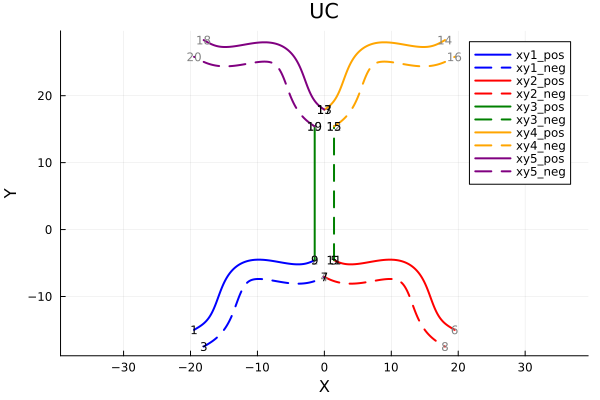

In [22]:
cell_angle1 = deg2rad(Cell_theta)

if vertical ==1
    ny = number_cell
    L = Length/(2*ny*cos(cell_angle1))
    nx = ceil(Int,Length/(L+((L*sin(cell_angle1)))))+2
else
    nx = number_cell
    L = Width/(2*nx*cos(cell_angle1))
    ny = ceil(Int,Length/(L+(L*sin(cell_angle1))))+2
end

println("nx ", nx," ny ",ny)
println("length ->" ,L)
t =L/thickness_ratio;    #mm (FLoat) 
lc=t/lc_para
println("thickness ->", t)

mid_ry = iseven(length([ratios_y])) ? length([ratios_y]) ÷ 2 : (length([ratios_y]) + 1) ÷ 2
mid_rx = iseven(length([ratios_x])) ? length([ratios_x]) ÷ 2 : (length([ratios_x]) + 1) ÷ 2

x_r = ratios_x
y_r = ratios_y

# Define manu_per, n, div, phi, h, t 
manu_per = 20; n = 7; div = 100; phi = deg2rad(Cell_theta); h = L; 
n_theta = 30
x_mid = 0.5 * L
x_e = x_r * (x_mid - 0.01 * manu_per * L)
if model_type==1
    y_max = 0.75 * L
    y_e = y_r * y_max
    
    Control_ptX = [0, 0.01*manu_per*L, (0.01*manu_per*L)+x_e, x_mid, (0.01*(100-manu_per)*L)-x_e, 0.01*(100-manu_per)*L, L]
    Control_ptY = [0, 0, y_e, y_max, y_e, 0, 0]
elseif model_type==2
    y_max = L
    y_e = y_r * y_max
    
    Control_ptX = [ 0, 0.01 * manu_per * L, (0.01 * manu_per * L) + x_e, x_mid, (0.01 * (100 - manu_per) * L) - x_e, 0.01 * (100 - manu_per) * L, L]
    Control_ptY = [ 0, 0, y_e, 0, -y_e, 0, 0]
else
    y_max = 0.2*L
    y_e = y_r * y_max
    
    Control_ptX = [0, 0.01*manu_per*L, (0.01*manu_per*L)+x_e, x_mid, (0.01*(100-manu_per)*L)-x_e, 0.01*(100-manu_per)*L, L]
    Control_ptY = [0, 0.5*y_e, 0.5*y_e, 0.75*y_e, 0.5*y_e, 0.5*y_e, 0]
end

Control_ptZ = zeros(n)
P = hcat(Control_ptX, Control_ptY, Control_ptZ)'  # 3×n
p = transpose(P)
n1 = n - 1

sigma = [factorial(n1) / (factorial(i) * factorial(n1 - i)) for i in 0:n1]

lv = Matrix{Float64}(undef, 0, n)
for u in 0:1/div:1
    UB = [sigma[d] * ((1 - u)^(n - d)) * (u^(d - 1)) for d in 1:n]
    lv = vcat(lv, transpose(UB))
end

Pxy = lv * p[:, 1:2]


Trans_mat1 = [cos(cell_angle1) -sin(cell_angle1); sin(cell_angle1) cos(cell_angle1)]

node_cordR1 = zeros(2, div + 1)
node_cordR1[1, :] .= vec(Pxy[:, 1])
node_cordR1[2, :] .= vec(Pxy[:, 2])


node_cordRevR1 = Trans_mat1 * node_cordR1
X1 = node_cordRevR1[1, :]
Y1 = node_cordRevR1[2, :]

XX2 = reverse(X1)
X2 = 2 * L * cos(cell_angle1) .- XX2
Y2 = reverse(Y1)

n_theta_ver = Int(n_theta/2 + 1)
X3 = fill(L*cos(phi), n_theta_ver)
mm = h + L*sin(phi)
Y3 = range(L*sin(phi), stop=mm, length=n_theta_ver)

X4 = X1 .+ L*cos(cell_angle1)
Y4 = Y1 .+ h .+ L*sin(cell_angle1)

X5 = -X4 .+ 2*L*cos(cell_angle1)
Y5 = Y4

x_coordinate1 = vcat(X1, X2, X3, X4, X5)
y_coordinate1 = vcat(Y1, Y2, Y3, Y4, Y5)
# Combine coordinates
x_coordinate1 = vcat(X1, X2, X3, X4, X5)
y_coordinate1 = vcat(Y1, Y2, Y3, Y4, Y5)

# --------
plt0 = plot(x_coordinate1, y_coordinate1;
    seriestype = :scatter,
    linewidth = 2,
    marker = :circle,
    markersize = 3,
    label = "",
    aspect_ratio = :equal,
    grid = true,
    xlabel = "X",
    ylabel = "Y",
    title = "Composite Geometry")

# ---- Display  ----
display(plt0)


shx = L*cos(cell_angle1)
shy = (0.5*L+L*sin(cell_angle1))

Xc1 = X1 .- shx; Xc2 = X2 .- shx; Xc3 = X3 .- shx; Xc4 = X4 .- shx; Xc5 = X5 .- shx
Yc1 = Y1 .- shy; Yc2 = Y2 .- shy; Yc3 = Y3 .- shy; Yc4 = Y4 .- shy; Yc5 = Y5 .- shy

x_coordinate2 = vcat(Xc1, Xc2, Xc3, Xc4, Xc5)
y_coordinate2 = vcat(Yc1, Yc2, Yc3, Yc4, Yc5)

xy1_cor = hcat(Xc1, Yc1)
xy2_cor = hcat(Xc2, Yc2)
xy3_cor = hcat(Xc3, Yc3)
xy4_cor = hcat(Xc4, Yc4)
xy5_cor = hcat(Xc5, Yc5)

function offset_curve2D(xy::Matrix{Float64}, offset_dist::Float64)
    n = size(xy, 1)
    xy_pos = zeros(n, 2)
    xy_neg = zeros(n, 2)

    for i in 2:(n-1)
        v = xy[i+1, :] - xy[i-1, :]
        v ./= norm(v)
        nvec = [-v[2], v[1]]
        xy_pos[i, :] = xy[i, :] .+ offset_dist .* nvec
        xy_neg[i, :] = xy[i, :] .- offset_dist .* nvec
    end

    # Endpoints
    v_start = xy[2, :] - xy[1, :]
    v_start ./= norm(v_start)
    n_start = [-v_start[2], v_start[1]]
    xy_pos[1, :] = xy[1, :] .+ offset_dist .* n_start
    xy_neg[1, :] = xy[1, :] .- offset_dist .* n_start

    v_end = xy[end, :] - xy[end-1, :]
    v_end ./= norm(v_end)
    n_end = [-v_end[2], v_end[1]]
    xy_pos[end, :] = xy[end, :] .+ offset_dist .* n_end
    xy_neg[end, :] = xy[end, :] .- offset_dist .* n_end

    return xy_pos, xy_neg
end

offset = t

xy1_pos, xy1_neg = offset_curve2D(xy1_cor, offset)
xy2_pos, xy2_neg = offset_curve2D(xy2_cor, offset)
xy3_pos, xy3_neg = offset_curve2D(xy3_cor, offset)
xy4_pos, xy4_neg = offset_curve2D(xy4_cor, offset)
xy5_po, xy5_ne = offset_curve2D(xy5_cor, offset)
xy5_pos, xy5_neg = xy5_ne, xy5_po 
# ----------------------------------------------------
# Function to check intersection between two segments
# ----------------------------------------------------
function segments_intersect(p1, p2, q1, q2)
    r = p2 .- p1
    s = q2 .- q1
    r_cross_s = r[1]*s[2] - r[2]*s[1]

    if isapprox(r_cross_s, 0.0; atol=1e-10)
        return (false, nothing)  # Segments are parallel or colinear
    end

    qp = q1 .- p1
    t = (qp[1]*s[2] - qp[2]*s[1]) / r_cross_s
    u = (qp[1]*r[2] - qp[2]*r[1]) / r_cross_s

    if 0.0 ≤ t ≤ 1.0 && 0.0 ≤ u ≤ 1.0
        intersection = p1 .+ t .* r
        return (true, intersection)
    else
        return (false, nothing)
    end
end

# ----------------------------------------------------
# Function to find all intersections between two curves
# ----------------------------------------------------
function find_intersections(curve1::Matrix{Float64}, curve2::Matrix{Float64})
    intersections = []

    for i in 1:size(curve1, 1)-1
        p1, p2 = curve1[i, :], curve1[i+1, :]
        for j in 1:size(curve2, 1)-1
            q1, q2 = curve2[j, :], curve2[j+1, :]
            flag, inter = segments_intersect(p1, p2, q1, q2)
            if flag
                push!(intersections, inter)
            end
        end
    end
    if isempty(intersections)
        @warn "⚠️ No intersections found between the curves."
    end
    return intersections
end

# ----------------------------------------------------
# Example usage for your data
# ----------------------------------------------------
# Assuming you have already defined:
# xy1_pos, xy2_pos = offset_curve2D(xy1_cor, offset), offset_curve2D(xy2_cor, offset)
println("computing intersection-->",1)
intersections1 = find_intersections(xy1_neg, xy2_neg)
println("computing intersection-->",2)
intersections2 = find_intersections(xy1_pos, xy3_pos)
println("computing intersection-->",3)
intersections3 = find_intersections(xy2_pos, xy3_neg)
println("computing intersection-->",4)
intersections4 = find_intersections(xy4_neg, xy3_neg)
println("computing intersection-->",5)
intersections5 = find_intersections(xy5_neg, xy3_pos)
println("computing intersection-->",6)
intersections6 = find_intersections(xy4_pos, xy5_pos)


function clip_curve_at_point(curve::Matrix{Float64}, pt::Vector{Float64}; tol=1e-8)
    for i in 1:size(curve, 1)-1
        p1 = curve[i, :]
        p2 = curve[i+1, :]

        # Check if pt lies on the segment [p1, p2]
        v = p2 - p1
        w = pt - p1
        proj = dot(v, w) / dot(v, v)
        on_segment = (0.0 <= proj <= 1.0) && norm(cross([v; 0.0], [w; 0.0])) < tol

        if on_segment
            # Truncate and insert the point
            clipped = vcat(curve[1:i, :], reshape(pt, 1, :))
            return clipped
        end
    end

    error("Point does not lie on any segment in the curve.")
end
function clip_after_point(curve::Matrix{Float64}, pt::Vector{Float64}; tol=1e-8)
    for i in 1:size(curve, 1)-1
        p1 = curve[i, :]
        p2 = curve[i+1, :]

        # Vector from p1 to p2 and from p1 to pt
        v = p2 - p1
        w = pt - p1

        # Check if pt lies on segment using projection and cross product
        proj = dot(v, w) / dot(v, v)
        on_segment = (0.0 <= proj <= 1.0) && norm(cross([v; 0.0], [w; 0.0])) < tol

        if on_segment
            # Include pt and all points from i+1 onwards
            return vcat(reshape(pt, 1, :), curve[(i+2):end, :])
        end
    end

    error("Point does not lie on any segment in the curve.")
end


for pt in intersections1
    xy1_neg =clip_curve_at_point(xy1_neg, pt)
    xy2_neg =clip_after_point(xy2_neg, pt)
end
for pt in intersections2
    xy1_pos =clip_curve_at_point(xy1_pos, pt)
    xy3_pos =clip_after_point(xy3_pos, pt)
end
for pt in intersections3
    xy2_pos =clip_after_point(xy2_pos, pt)
    xy3_neg =clip_after_point(xy3_neg, pt)
end
for pt in intersections4
    xy4_neg =clip_after_point(xy4_neg, pt)
    xy3_neg =clip_curve_at_point(xy3_neg, pt)
end
for pt in intersections5
    xy5_neg =clip_after_point(xy5_neg, pt)
    xy3_pos =clip_curve_at_point(xy3_pos, pt)
end
for pt in intersections6
    xy5_pos =clip_after_point(xy5_pos, pt)
    xy4_pos =clip_after_point(xy4_pos, pt)
end


plt = plot(title="UC", xlabel="X", ylabel="Y", aspect_ratio=:equal)
# plot!(x_coordinate2, y_coordinate2, label="org", seriestype = :scatter, color = :magenta, marker = :dot)

# Plot each pair with different color and label
plot!(plt, xy1_pos[:,1], xy1_pos[:,2], label="xy1_pos", lw=2, color=:blue)
plot!(plt, xy1_neg[:,1], xy1_neg[:,2], label="xy1_neg", lw=2, color=:blue, linestyle=:dash)

plot!(plt, xy2_pos[:,1], xy2_pos[:,2], label="xy2_pos", lw=2, color=:red)
plot!(plt, xy2_neg[:,1], xy2_neg[:,2], label="xy2_neg", lw=2, color=:red, linestyle=:dash)

plot!(plt, xy3_pos[:,1], xy3_pos[:,2], label="xy3_pos", lw=2, color=:green)
plot!(plt, xy3_neg[:,1], xy3_neg[:,2], label="xy3_neg", lw=2, color=:green, linestyle=:dash)

plot!(plt, xy4_pos[:,1], xy4_pos[:,2], label="xy4_pos", lw=2, color=:orange)
plot!(plt, xy4_neg[:,1], xy4_neg[:,2], label="xy4_neg", lw=2, color=:orange, linestyle=:dash)

plot!(plt, xy5_pos[:,1], xy5_pos[:,2], label="xy5_pos", lw=2, color=:purple)
plot!(plt, xy5_neg[:,1], xy5_neg[:,2], label="xy5_neg", lw=2, color=:purple, linestyle=:dash)

point_counter = 1  # Start numbering from 1

curve_list = [
    xy1_pos, xy1_neg,
    xy2_pos, xy2_neg,
    xy3_pos, xy3_neg,
    xy4_pos, xy4_neg,
    xy5_pos, xy5_neg
]

point_counter = 1  # Start numbering from 1
offset_factor = 0.01  # Adjust this if the domain is large or small

for curve in curve_list
    start_point = curve[1, :]
    end_point = curve[end, :]

    # Offset direction for annotation inside the curve
    if size(curve, 1) > 1
        # For start point, shift toward the next point
        dir_start = curve[2, :] - start_point
        norm_start = dir_start / norm(dir_start)
        ann_start = start_point .+ offset_factor * norm_start

        # For end point, shift toward the previous point
        dir_end = curve[end-1, :] - end_point
        norm_end = dir_end / norm(dir_end)
        ann_end = end_point .+ offset_factor * norm_end
    else
        ann_start = start_point
        ann_end = end_point
    end

    # Annotate shifted points
    annotate!(plt, ann_start[1], ann_start[2], text(string(point_counter), :black, 8))
    point_counter += 1
    annotate!(plt, ann_end[1], ann_end[2], text(string(point_counter), :gray, 8))
    point_counter += 1
end


# Display the plot
display(plt)


In [23]:
using GridapGmsh
using Gmsh: gmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using LineSearches: BackTracking
using LinearAlgebra

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("uc")

point_tags1p = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy1_pos)]
s1p = gmsh.model.occ.addSpline(point_tags1p)
point_tags2p = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy2_pos)]
s2p = gmsh.model.occ.addSpline(point_tags2p)
point_tags3p = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy3_pos)]
s3p = gmsh.model.occ.addSpline(point_tags3p)
point_tags4p = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy4_pos)]
s4p = gmsh.model.occ.addSpline(point_tags4p)
point_tags5p = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy5_pos)]
s5p = gmsh.model.occ.addSpline(point_tags5p)
point_tags1n = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy1_neg)]
s1n = gmsh.model.occ.addSpline(point_tags1n)
point_tags2n = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy2_neg)]
s2n = gmsh.model.occ.addSpline(point_tags2n)
point_tags3n = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy3_neg)]
s3n = gmsh.model.occ.addSpline(point_tags3n)
point_tags4n = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy4_neg)]
s4n = gmsh.model.occ.addSpline(point_tags4n)
point_tags5n = [gmsh.model.occ.addPoint(x, y, 0.0, lc) for (x, y) in eachrow(xy5_neg)]
s5n = gmsh.model.occ.addSpline(point_tags5n)

l1a = gmsh.model.occ.addLine(point_tags1n[1], point_tags1p[1])
l2b = gmsh.model.occ.addLine(point_tags2p[end], point_tags2n[end])
l4b = gmsh.model.occ.addLine(point_tags4p[end], point_tags4n[end])
l5a = gmsh.model.occ.addLine(point_tags5n[end], point_tags5p[end])

loop1 = gmsh.model.occ.addCurveLoop([l1a, s1p, s3p,s5n,l5a,-s5p,s4p,l4b,-s4n,-s3n,s2p,l2b,-s2n,-s1n])
surf1 = gmsh.model.occ.addPlaneSurface([loop1])

all_point_tags = vcat(
  point_tags1p, point_tags2p, point_tags3p, point_tags4p, point_tags5p,
  point_tags1n, point_tags2n, point_tags3n, point_tags4n, point_tags5n
)

# Delete point entities (dimension 0)
gmsh.model.occ.remove([(0, tag) for tag in all_point_tags])
gmsh.model.occ.synchronize()
println("✅ Done till here!")

✅ Done till here!


In [24]:
e1x =  L * cos(cell_angle1)
e1y =  L + (L * sin(cell_angle1))

e2x = -L * cos(cell_angle1)
e2y =  L + (L * sin(cell_angle1))

# Vectors
e1 = [e1x, e1y]
e2 = [e2x, e2y]

# Print values
@printf("e1 = [%.4f, %.4f]\n", e1x, e1y)
@printf("e2 = [%.4f, %.4f]\n", e2x, e2y)

shift = -(L + (L * sin(cell_angle1)))

p1 = gmsh.model.occ.addPoint(0,shift,0.0,lc) 
p2 = gmsh.model.occ.addPoint(0,-shift,0.0,lc) 
p3 = gmsh.model.occ.addPoint(e1x,e1y+shift,0.0,lc)
p4 = gmsh.model.occ.addPoint(e2x,e2y+shift,0.0,lc)

l1 = gmsh.model.occ.addLine(p1,p3)
l2 = gmsh.model.occ.addLine(p1,p4)
l3 = gmsh.model.occ.addLine(p2,p3)
l4 = gmsh.model.occ.addLine(p2,p4)
gmsh.model.occ.remove(p1, true) 
gmsh.model.occ.remove(p2, true)
gmsh.model.occ.remove(p3, true)
gmsh.model.occ.remove(p4, true) 
loop2 = gmsh.model.occ.addCurveLoop([l1,-l3,l4,-l2])
surf2 = gmsh.model.occ.addPlaneSurface([loop2])
gmsh.model.occ.remove(l1, true) 
gmsh.model.occ.remove(l2, true)
gmsh.model.occ.remove(l3, true)
gmsh.model.occ.remove(l4, true) 
intersected,_ = gmsh.model.occ.intersect([(2, surf1)],[(2, surf2)],-1,true,true)
gmsh.model.occ.synchronize()

e1 = [18.7500, 32.4760]
e2 = [-18.7500, 32.4760]
Info    : Cannot bind existing OpenCASCADE surface 1 to second tag 2                                                                   
Info    : Could not preserve tag of 2D object 2 (->1)


In [25]:
translated1 = gmsh.model.occ.copy(intersected)
gmsh.model.occ.translate(translated1, e1x, shift, 0.0)
fused_cell1, _ = gmsh.model.occ.fuse(intersected, translated1)

Info    : Cannot bind existing OpenCASCADE surface 1 to second tag 2                                                    
Info    : Could not preserve tag of 2D object 2 (->1)


(Tuple{Int32, Int32}[(2, 1)], Vector{Tuple{Int32, Int32}}[[(2, 1)], [(2, 1)]])

In [26]:
nx1 = ceil(Int,0.5*nx)
ny1 = ceil(Int,0.5*ny)
dx = 2*e1x
dy = 2*e1y
all_cells1 = []
for j in 0:ny1
    for i in 0:nx1
        new_UC1 = gmsh.model.occ.copy(fused_cell1)
        gmsh.model.occ.translate(new_UC1, i * dx, j * dy, 0.0)
        append!(all_cells1, new_UC1)
    end
end
unique_cells1 = unique(all_cells1)

all_cells2 = []
for j in 0:ny1
    for i in 0:nx1
        new_UC2 = gmsh.model.occ.copy(fused_cell1)
        gmsh.model.occ.translate(new_UC2, -i * dx, j * dy, 0.0)
        append!(all_cells2, new_UC2)
    end
end
unique_cells2 = unique(all_cells2)
all_cells3 = []
for j in 0:ny1
    for i in 0:nx1
        new_UC3 = gmsh.model.occ.copy(fused_cell1)
        gmsh.model.occ.translate(new_UC3, -i * dx, -j * dy, 0.0)
        append!(all_cells3, new_UC3)
    end
end
unique_cells3 = unique(all_cells3)
all_cells4 = []
for j in 0:ny1
    for i in 0:nx1
        new_UC4 = gmsh.model.occ.copy(fused_cell1)
        gmsh.model.occ.translate(new_UC4, i * dx, -j * dy, 0.0)
        append!(all_cells4, new_UC4)
    end
end
unique_cells4 = unique(all_cells4)
gmsh.model.occ.synchronize()

gmsh.model.occ.remove(fused_cell1, true)  

gmsh.model.occ.synchronize()
a_f1,_ = gmsh.model.occ.fuse(unique_cells1,unique_cells2)
a_f2,_ = gmsh.model.occ.fuse(a_f1,unique_cells3)
a_f3,_ = gmsh.model.occ.fuse(a_f2,unique_cells4)

gmsh.model.occ.synchronize()

if vertical==1
    angle_rad = -times*π / 2  # 90 degrees in radians
    gmsh.model.occ.rotate(a_f3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, angle_rad)
end


Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 3                                                            
Info    : Could not preserve tag of 2D object 3 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 4
Info    : Could not preserve tag of 2D object 4 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 5
Info    : Could not preserve tag of 2D object 5 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 6
Info    : Could not preserve tag of 2D object 6 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 7
Info    : Could not preserve tag of 2D object 7 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 8
Info    : Could not preserve tag of 2D object 8 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 9
Info    : Could not preserve tag of 2D object 9 (->2)
Info    : Cannot bind existing OpenCASCADE surface 2 to second tag 10
Info    :

In [27]:
x_rect, y_rect = -Width*0.5, -Length*0.5
w_rect, h_rect = Width, Length

if enable_notch ==1
    notch_x = 0.5 * Width - notch_length    # starting x-position of notch
    notch_y = notch_thickness / 2.0         # half-thickness in y
    notch = gmsh.model.occ.addRectangle(notch_x, -notch_y, 0.0, notch_length, notch_thickness)
    cover_rect = gmsh.model.occ.addRectangle(x_rect, y_rect, 0.0, w_rect, h_rect)
    cover_rect2, _ = gmsh.model.occ.cut([(2, cover_rect)], [(2, notch)])
    intersection_result, _ = gmsh.model.occ.intersect(cover_rect2, a_f3)
    println("notch created")
else
    cover_rect = gmsh.model.occ.addRectangle(x_rect, y_rect, 0.0, w_rect, h_rect)
    intersection_result, _ = gmsh.model.occ.intersect([(2, cover_rect)], a_f3)
end

gmsh.model.occ.synchronize()
println("✅ Done till here!")

Info    : Cannot bind existing OpenCASCADE surface 4 to second tag 2                                                                         
Info    : Could not preserve tag of 2D object 2 (->4)
notch created
✅ Done till here!


In [28]:
#Separation of two different domain
if enable_notch ==1
    frag_rect = gmsh.model.occ.addRectangle(x_rect, y_rect, 0.0, w_rect, h_rect)
    notch2 = gmsh.model.occ.addRectangle(notch_x, -notch_y, 0.0, notch_length, notch_thickness)
    
    frag_rect2, _ = gmsh.model.occ.cut([(2, frag_rect)], [(2, notch2)])
    fragment_result, _ = gmsh.model.occ.fragment(frag_rect2, intersection_result)
else
    frag_rect = gmsh.model.occ.addRectangle(x_rect, y_rect, 0.0, w_rect, h_rect)
    fragment_result, _ = gmsh.model.occ.fragment([(2, frag_rect)], intersection_result)
end

gmsh.model.occ.synchronize()

# Separate lattice and Matrix surfaces
frag_surfs = [(dim, tag) for (dim, tag) in fragment_result if dim == 2]
lattice_tags = Set(tag for (dim, tag) in intersection_result if dim == 2)
lattice_surfs = [(dim, tag) for (dim, tag) in frag_surfs if tag in lattice_tags]
Matrix_surfs = [(dim, tag) for (dim, tag) in frag_surfs if !(tag in lattice_tags)]
#println(Matrix_surfs)
println("✅ Done till here!")

✅ Done till here!Fragments - Filling splits of edges                                                                                   


In [29]:
gmsh.model.occ.synchronize()

# Set mesh size at all points uniformly
for (dim, tag) in gmsh.model.getEntities(0)  
    gmsh.model.mesh.setSize([(dim, tag)], lc)
end

gmsh.model.occ.synchronize()
println("✅ Done till here!")

✅ Done till here!


In [30]:
# Physical groups
if !isempty(lattice_surfs)
    pg_lattice = gmsh.model.addPhysicalGroup(2, [tag for (dim, tag) in lattice_surfs])
    gmsh.model.setPhysicalName(2, pg_lattice, "Lattice")
end

if !isempty(Matrix_surfs)
    pg_Matrix = gmsh.model.addPhysicalGroup(2, [tag for (dim, tag) in Matrix_surfs])
    gmsh.model.setPhysicalName(2, pg_Matrix, "Matrix")
end

# Identify top and bottom edges Matrixd on Y-coordinates
bottom_edges = Int[]
top_edges = Int[]
hL = Length*0.5
for (dim, tag) in gmsh.model.getEntities(1)  # Lines only
    xmin, ymin, zmin, xmax, ymax, zmax = gmsh.model.getBoundingBox(dim, tag)

    if abs(ymin + hL) < 1e-6 && abs(ymax + hL) < 1e-6
        push!(bottom_edges, tag)
    elseif abs(ymin - hL) < 1e-6 && abs(ymax - hL) < 1e-6
        push!(top_edges, tag)
    end
end
println(bottom_edges)
if !isempty(bottom_edges)
    tag1 = gmsh.model.addPhysicalGroup(1, bottom_edges)
    gmsh.model.occ.synchronize()  # <-- synchronize before naming
    gmsh.model.setPhysicalName(1, tag1, "BottomEdge")
end

if !isempty(top_edges)
    tag2 = gmsh.model.addPhysicalGroup(1, top_edges)
    gmsh.model.occ.synchronize()
    gmsh.model.setPhysicalName(1, tag2, "TopEdge")
end
println("✅ Done till here!")

[107, 111, 273, 274, 275]
✅ Done till here!


In [31]:
# Finalize geometry
gmsh.model.occ.synchronize()
gmsh.model.mesh.generate(2)
filename = @sprintf("Model%d_xr_%.1f_yr_%.1f_%dx%d.msh", model_type, ratios_x, ratios_y, Length, Width)
gmsh.write(filename)


# Show physical groups
println("Physical groups defined:")
for (dim, tag) in gmsh.model.getPhysicalGroups()
    name = gmsh.model.getPhysicalName(dim, tag)
    println(" - [$name] dim=$dim, tag=$tag")
end

gmsh.finalize()
println("✅ Done till here!")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 2 (BSpline)
Info    : [ 10%] Meshing curve 3 (BSpline)
Info    : [ 10%] Meshing curve 4 (BSpline)
Info    : [ 10%] Meshing curve 6 (BSpline)
Info    : [ 10%] Meshing curve 8 (BSpline)
Info    : [ 10%] Meshing curve 10 (BSpline)
Info    : [ 10%] Meshing curve 11 (BSpline)
Info    : [ 10%] Meshing curve 12 (BSpline)
Info    : [ 10%] Meshing curve 13 (BSpline)
Info    : [ 10%] Meshing curve 14 (BSpline)
Info    : [ 10%] Meshing curve 15 (BSpline)
Info    : [ 10%] Meshing curve 16 (BSpline)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (BSpline)
Info    : [ 10%] Meshing curve 20 (BSpline)
Info    : [ 10%] Meshing curve 21 (BSpline)
Info    : [ 10%] Meshing curve 22 (BSpline)
Info    : [ 10%] Meshing curve 23 (BSpline)
Info    : [ 10%] Meshing curve 24 (BSpline)
Info    : [ 10%] Meshing curve 25 (BSpline)
Info    : [ 10%] Meshing curve 26 (BSpline)
Info    : [ 10%] Me